In [89]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import cv2
from tqdm.notebook import tqdm
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.optim import Adam, SGD
import h5py as h5
import torch.nn.functional as F
import random
from torchsummary import summary

%matplotlib inline

In [75]:
device = torch.device("cuda")

#### Reading data

In [76]:
train_data = h5.File("Signs_Data_Training.h5", "r")

In [77]:
test_data = h5.File("Signs_Data_Testing.h5", "r")

In [78]:
train_data.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [79]:
classes, train_X, train_Y = list(train_data["list_classes"]), \
                            torch.from_numpy(np.array(train_data["train_set_x"])), \
                            torch.from_numpy(np.array(train_data["train_set_y"]))

In [80]:
test_X, test_Y = torch.from_numpy(np.array(test_data["test_set_x"])), \
                   torch.from_numpy(np.array(test_data["test_set_y"]))

In [81]:
classes

[0, 1, 2, 3, 4, 5]

In [82]:
train_X.shape

torch.Size([1080, 64, 64, 3])

In [83]:
train_Y.shape

torch.Size([1080])

#### Visualization

In [92]:
r_images = [random.randint(0, 1000) for _ in range(9)]

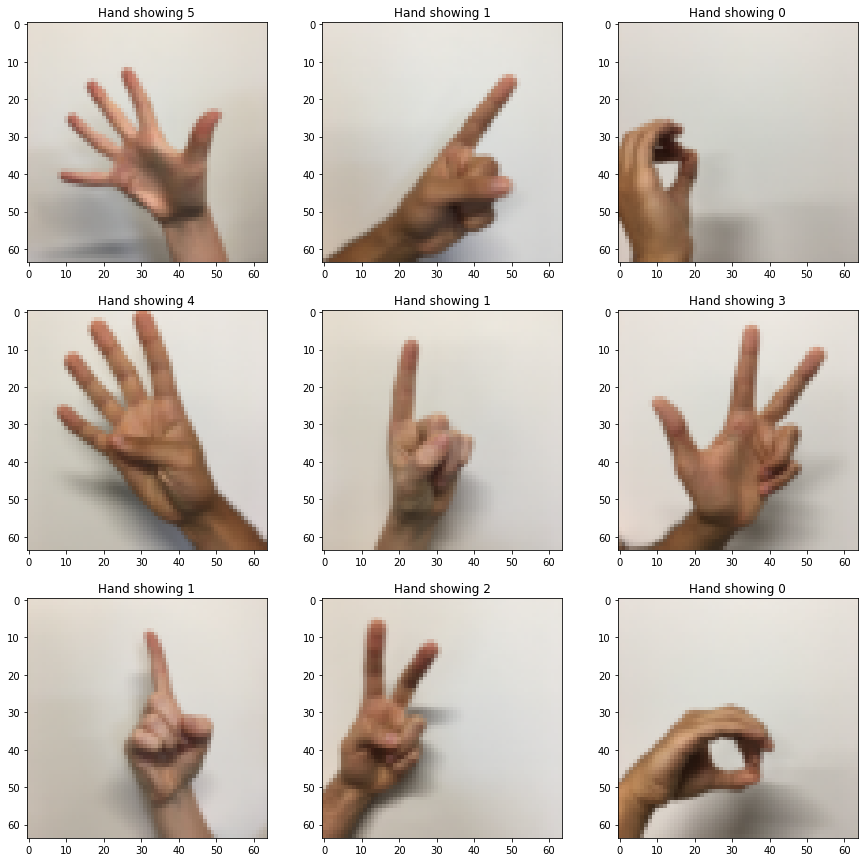

In [94]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))
c = 0
for i in range(3):
    for j in range(3):
        axes[i, j].imshow(train_X[r_images[c]])
        axes[i, j].set_title("Hand showing {}".format(train_Y[r_images[c]]))
        c += 1

#### Utils classes

In [85]:
class HandDataset(Dataset):
    def __init__(self, x, y):
        self.x = x.float()
        self.y = y.float()
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [86]:
train_ds = HandDataset(train_X, train_Y)

In [88]:
test_ds = HandDataset(test_X, test_Y)